In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib

# Hyper param search results

## Gradient Boosting

In [8]:
dd = pd.read_csv("Hyperparam_search/Graident_Tree_Boosting_GS_results.csv")

In [113]:
dd.sort_values(by=["mean_test_F1"], ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_iter_no_change,param_subsample,params,...,std_test_accuracy,rank_test_accuracy,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
1,1,1363.824692,160.471544,4.911603,0.592267,0.10,500,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",...,0.003503,1,0.801555,0.809922,0.798996,0.811879,0.797032,0.803877,0.005944,1
2,2,1192.315114,131.051183,4.252643,0.439848,0.10,1000,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 1000, '...",...,0.002783,2,0.802123,0.805359,0.798023,0.812596,0.794693,0.802559,0.006184,2
3,3,1172.526933,491.750465,4.173367,1.614136,0.10,1500,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 1500, '...",...,0.006741,3,0.787281,0.815247,0.800108,0.806662,0.790726,0.800005,0.010244,3
7,7,3434.386611,64.535056,5.118638,2.428189,0.01,1500,20,0.7,"{'learning_rate': 0.01, 'n_estimators': 1500, ...",...,0.003079,4,0.787937,0.799485,0.788407,0.796244,0.781238,0.790662,0.006486,4
6,6,3049.183289,113.677140,9.204574,1.622832,0.01,1000,20,0.7,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",...,0.002896,5,0.778441,0.789974,0.779116,0.790491,0.774551,0.782515,0.006494,5


In [45]:
np.unique(dd["param_learning_rate"].values)

array([0.01, 0.1 ])

In [46]:
np.unique(dd["param_n_estimators"].values)

array([ 100,  500, 1000, 1500])

In [50]:
LR,NE = np.meshgrid(np.unique(dd["param_learning_rate"].values), np.unique(dd["param_n_estimators"].values))

In [83]:
LR

array([[0.01, 0.1 ],
       [0.01, 0.1 ],
       [0.01, 0.1 ],
       [0.01, 0.1 ]])

In [94]:
dd_grid = lambda df,lr,ne: df[df["param_learning_rate"]==lr][df["param_n_estimators"]==ne]["mean_test_F1"].values[0]

In [95]:
Y_1 = [dd_grid(dd,0.1, n) for n in np.unique(dd["param_n_estimators"].values)]

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [96]:
Y_2 = [dd_grid(dd,0.01, n) for n in np.unique(dd["param_n_estimators"].values)]

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [97]:
Z = np.vstack((Y_2, Y_1)).T

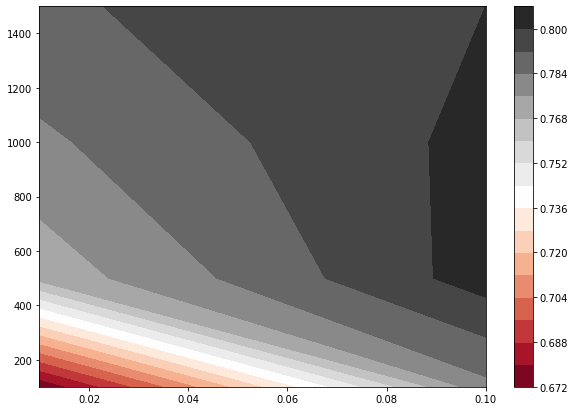

In [98]:
plt.figure(figsize=(10,7))
plt.contourf(LR, NE, Z, 20, cmap='RdGy')
plt.colorbar()
plt.show()

In [93]:
dc = pd.read_csv("Hyperparam_search/Graident_Tree_Boosting_CVAE_LS_GS_results.csv")

In [114]:
dc.sort_values(by=["mean_test_F1"], ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_iter_no_change,param_subsample,params,...,std_test_accuracy,rank_test_accuracy,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
2,2,135.228478,40.145879,0.535533,0.153077,0.10,1000,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 1000, '...",...,0.002537,1,0.788781,0.803516,0.795395,0.802655,0.787875,0.795645,0.006613,1
3,3,63.831421,21.568672,0.267960,0.084825,0.10,1500,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 1500, '...",...,0.005036,2,0.785106,0.798503,0.796936,0.801955,0.781604,0.792821,0.007975,2
1,1,72.927708,36.371233,0.306629,0.144226,0.10,500,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",...,0.007360,3,0.789289,0.793782,0.803340,0.804890,0.772151,0.792690,0.011805,3
7,7,442.726007,16.072229,1.697251,0.007759,0.01,1500,20,0.7,"{'learning_rate': 0.01, 'n_estimators': 1500, ...",...,0.003054,4,0.783275,0.797217,0.789154,0.801060,0.779098,0.789961,0.008237,4
6,6,284.701999,8.511558,1.137838,0.012376,0.01,1000,20,0.7,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",...,0.003312,5,0.774004,0.788307,0.779025,0.790700,0.773780,0.781164,0.007104,5


In [101]:
Y_1 = [dd_grid(dc,0.01, n) for n in np.unique(dc["param_n_estimators"].values)]
Y_2 = [dd_grid(dc,0.1, n) for n in np.unique(dc["param_n_estimators"].values)]
Z1 = np.vstack((Y_1, Y_2)).T

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


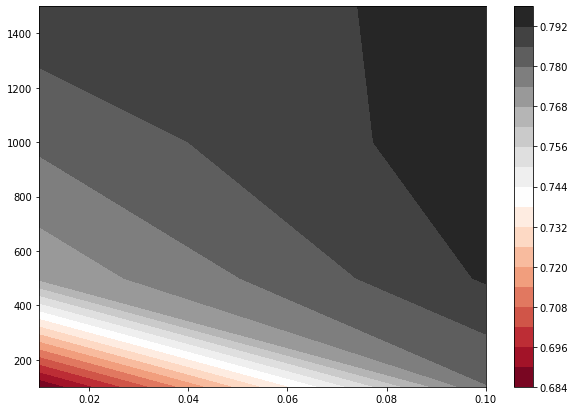

In [102]:
plt.figure(figsize=(10,7))
plt.contourf(LR, NE, Z1, 20, cmap='RdGy')
plt.colorbar()
plt.show()

In [103]:
dr = pd.read_csv("Hyperparam_search/Graident_Tree_Boosting_LSTMVAE_LS_GS_results.csv")

In [119]:
dr.sort_values(by=["mean_test_F1"], ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_iter_no_change,param_subsample,params,...,std_test_accuracy,rank_test_accuracy,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
2,2,72.628706,16.228849,0.296876,0.060181,0.10,1000,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 1000, '...",...,0.004295,1,0.766551,0.784310,0.776741,0.785773,0.773225,0.777320,0.007119,1
7,7,426.715195,17.676517,1.677381,0.042079,0.01,1500,20,0.7,"{'learning_rate': 0.01, 'n_estimators': 1500, ...",...,0.003454,3,0.770459,0.780865,0.776847,0.781425,0.766778,0.775275,0.005778,2
1,1,60.229023,19.307404,0.246718,0.071638,0.10,500,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",...,0.004450,2,0.769641,0.784327,0.771124,0.782359,0.768664,0.775223,0.006705,3
3,3,54.951538,21.385327,0.223219,0.077701,0.10,1500,20,0.7,"{'learning_rate': 0.1, 'n_estimators': 1500, '...",...,0.004027,4,0.763158,0.781094,0.771697,0.781519,0.768503,0.773194,0.007165,4
6,6,285.818368,13.736511,1.138197,0.013024,0.01,1000,20,0.7,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",...,0.004276,5,0.764572,0.782514,0.773292,0.778818,0.762343,0.772308,0.007832,5


In [104]:
Y_1 = [dd_grid(dr,0.01, n) for n in np.unique(dr["param_n_estimators"].values)]
Y_2 = [dd_grid(dr,0.1, n) for n in np.unique(dr["param_n_estimators"].values)]
Z2 = np.vstack((Y_1, Y_2)).T

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


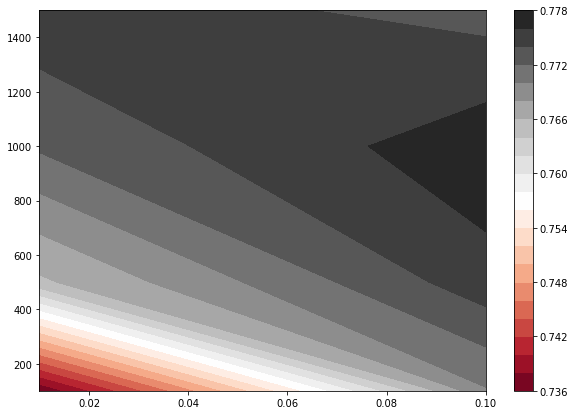

In [105]:
plt.figure(figsize=(10,7))
plt.contourf(LR, NE, Z2, 20, cmap='RdGy')
plt.colorbar()
plt.show()

In [ ]:
1/(np.var(X_train)*X_train.shape[1])

# Best params 
## DeepDense VAE

In [142]:
X_train = np.load("data/encoded_data_train_DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.npy")
y_train = np.load("data/labels_train.npy")
X_test = np.load("data/encoded_data_test_DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.npy")
y_test = np.load("data/labels_test.npy")

In [143]:
dd_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample=0.7, n_iter_no_change=50, verbose=True)

In [144]:
dd_clf.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       36131.2409        1960.4802            4.81m
         2       33622.5183         991.0259            4.68m
         3       31907.7924         764.3794            5.19m
         4       30344.8810         598.4269            5.05m
         5       29238.9626         522.5916            5.18m
         6       28199.3410         413.4237            5.21m
         7       27495.1159         325.4065            5.13m
         8       26708.6730         323.8698            5.12m
         9       26146.1703         256.2357            5.42m
        10       25422.6371         252.1090            5.76m
        20       22180.7544          92.5340            5.28m
        30       20562.5346          59.1883            5.09m
        40       19456.6186          26.2112            5.10m
        50       18711.4918          26.9687            4.99m
        60       18213.8957          12.8264            5.01m
       

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=50, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

In [145]:
dd_clf.n_estimators_

500

In [146]:
#joblib.dump(dd_clf, "models_and_losses/Gradient_Tree_Boosting_DeepDenseVAE{n_estim=500-early_stopping,lr=0,1,subsample=0,7}.joblib")

['models_and_losses/Gradient_Tree_Boosting_DeepDenseVAE{n_estim=500-early_stopping,lr=0,1,subsample=0,7}.joblib']

In [147]:
y_pred_dd = dd_clf.predict(X_test)

In [148]:
f1_score(y_true=y_test, y_pred = y_pred_dd, average="macro")

0.8167759394182772

In [149]:
accuracy_score(y_true=y_test, y_pred = y_pred_dd)

0.857373326959847

In [150]:
confusion_matrix(y_true=y_test, y_pred = y_pred_dd)

array([[2884, 1185,   26,  140],
       [ 405, 9874,   34,  132],
       [  25,   48,  391,   15],
       [ 185,  179,   13, 1200]])

## CNN-VAE

In [151]:
X_train = np.load("data/encoded_data_train_DeepConvVAE_ELU_NLL_250ep_lr-{1e-3, 1e-4}_bs-300.npy")
X_test = np.load("data/encoded_data_test_DeepConvVAE_ELU_NLL_250ep_lr-{1e-3, 1e-4}_bs-300.npy")

In [152]:
dc_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.7, n_iter_no_change=50, verbose=True)

In [153]:
dc_clf.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       35928.6610        1994.3430           10.00m
         2       33612.0603        1029.3719            9.42m
         3       31690.2714         775.5264            9.20m
         4       30349.4240         610.3557            9.12m
         5       29206.7606         492.8922            9.28m
         6       28169.1437         406.5100            9.26m
         7       27298.3573         352.7039            9.35m
         8       26622.9455         291.5632            9.58m
         9       25921.8196         269.1957            9.72m
        10       25512.4242         222.6032            9.62m
        20       21998.7155          91.1914            9.04m
        30       20396.1107          28.4340            8.85m
        40       19425.7226          19.7256            8.65m
        50       18830.8415          12.0093            8.53m
        60       18199.8996          16.6281            8.59m
       

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=50, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

In [154]:
dc_clf.n_estimators_

579

In [155]:
#joblib.dump(dc_clf, "models_and_losses/Gradient_Tree_Boosting_CNN-VAE{n_estim=579-early_stopping,lr=0,1,subsample=0,7}.joblib")

['models_and_losses/Gradient_Tree_Boosting_CNN-VAE{n_estim=579-early_stopping,lr=0,1,subsample=0,7}.joblib']

In [156]:
y_pred_dc = dc_clf.predict(X_test)

In [157]:
f1_score(y_true=y_test, y_pred = y_pred_dc, average="macro")

0.8163829270773644

In [158]:
accuracy_score(y_true=y_test, y_pred = y_pred_dc)

0.8560587954110899

In [159]:
confusion_matrix(y_true=y_test, y_pred = y_pred_dc)

array([[2851, 1227,   23,  134],
       [ 436, 9860,   42,  107],
       [  26,   46,  391,   16],
       [ 172,  160,   20, 1225]])

## LSTM-VAE

In [178]:
X_train1 = np.load("data/mu_lstm1.npy")
X_train2 = np.load("data/mu_lstm2.npy")
X_train3 = np.load("data/mu_lstm3.npy")

X_train = np.vstack((X_train1, X_train2, X_train3))

X_test = np.load("data/mu_lstm_test.npy")

In [161]:
dr_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.7, n_iter_no_change=50, verbose=True)

In [162]:
dr_clf.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       35513.6796        2241.4136            9.42m
         2       32892.3387        1094.0257            9.41m
         3       31146.9739         800.8722            9.14m
         4       29506.8873         616.6117            9.28m
         5       28277.0804         508.9576            9.15m
         6       27309.3442         394.3256            9.85m
         7       26650.6110         331.9223            9.77m
         8       25981.6419         273.4865            9.66m
         9       25328.5222         282.8019            9.61m
        10       24848.7343         227.3767            9.50m
        20       21507.1352          71.6896            9.40m
        30       19880.8460          43.1108           10.07m
        40       19093.0261          23.5123            9.65m
        50       18501.6901          11.8172            9.38m
        60       18071.4008           5.8146            9.04m
       

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=50, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

In [163]:
dr_clf.n_estimators_

362

In [183]:
#joblib.dump(dc_clf, "models_and_losses/Gradient_Tree_Boosting_LSTM-VAE{n_estim=362-early_stopping,lr=0,1,subsample=0,7}.joblib")

['models_and_losses/Gradient_Tree_Boosting_LSTM-VAE{n_estim=368-early_stopping,lr=0,1,subsample=0,7}.joblib']

In [179]:
y_pred_dr = dr_clf.predict(X_test)

In [180]:
f1_score(y_true=y_test, y_pred = y_pred_dr, average="macro")

0.792792574984842

In [181]:
accuracy_score(y_true=y_test, y_pred = y_pred_dr)

0.831560707456979

In [182]:
confusion_matrix(y_true=y_test, y_pred = y_pred_dr)

array([[2491, 1577,   32,  135],
       [ 459, 9795,   46,  145],
       [  20,   43,  399,   17],
       [ 162,  156,   27, 1232]])